# Лабораторная работа №1: Исследование двумерного нормального распределения

---


Выполнил студент гр. 1384 Шаганов Вячеслав. Вариант №21

# Цель работы

Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения
Случайный вектор $\xi$ имеет многомерное нормальное распределение, если существует вектор независимых стандартных нормальных случайных величин ${\eta}$, матрица $A$ и вещественный вектор $b$, такие что: $\xi = A \eta + b$.

Плотность многомерного невырожденного нормального распределения имеет вид: $\mathcal{p}_{{\xi}}(x) = \frac{1}{(2\pi)^\frac{n}{2}\sqrt{\det \Sigma}} \exp\left(-\frac{1}{2}\left({x}-{\mu}\right)^\intercal \Sigma^{-1}\left({x}-{\mu}\right)\right)$

где ${\mu} = \mathbb{E}{\xi} = \left(\mathbb{E}\xi_1, \dots, \mathbb{E}\xi_n\right)^\intercal$ - вектор математических ожиданий компонент,

$\Sigma =
\begin{pmatrix}
  {\mathrm{cov}}\left(\xi_1,\xi_1\right) & \dots & {\mathrm{cov}}\left(\xi_1,\xi_n\right) \\
  \dots & \dots & \dots \\
  {\mathrm{cov}}\left(\xi_n,\xi_1\right) & \dots & {\mathrm{cov}}\left(\xi_n,\xi_n\right)
\end{pmatrix}
$ - ковариационная матрица.

Свойства многомерного нормального распределения:
- Линейная комбинация случайных переменных, принадлежащих многомерному нормальному распределению, также является нормально распределенной
- Условные и безусловные распределения, полученные из многомерного нормального распределения, также являются нормально распределенными. $\mathcal{p}_{\xi|\eta=y}(x) = \frac{\mathcal{p}_{\xi,\eta}(x,y)}{\mathcal{p}_{\eta}(y)}$
- Параметры многомерного нормального распределения (средние и ковариационная матрица) полностью описывают его форму
- Случайная величина, полученная афинным преобразованием из нормальной случайной величины, также нормально распределена. Если ${\xi} \sim \mathcal{N}\left({\mu}, \Sigma\right)$, $A$ - произвольная матрица размерности $m \times n$, ${b}$ - произвольный вектор размерности $m \times 1$, то $A{\xi}+{b} \sim \mathcal{N}\left(A{\mu}+{b}, A \Sigma A^\intercal\right)$.

## Постановка задачи

Для заданного двумерного нормального вектора необходимо вычислить числовые характеристики и выполнить заданные преобразования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
При выполнении работы будет использоваться язык Python.

Импортируем используемые далее библиотеки.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Плотность распределения:

$p_{\xi,\eta}(x,y)=C \cdot \exp \left( -\frac{1}{2}(3x^2 + 4xy + 6y^2 + 2x - 8y + 5) \right)$


### Задание 1
Вычислить вектор  математических ожиданий и ковариационные характеристики данного случайного вектора. Построить график плотности распределения $p_{\xi,\eta}$.

Преобразуем квадратичную форму в показателе экспоненты

$q(x,y) = 3x^2 + 4xy + 6y^2 + 2x - 8y + 5$

$3x^2 + 4xy + 6y^2 + 2x - 8y + 5
= 3\left(x^2 + \frac{4}{3}xy + \frac{2}{3}x\right) + 6y^2 - 8y + 5 \\
= 3\left(x^2 + 2x\left(\frac{2y + 1}{3}\right) + \left(\frac{2y + 1}{3}\right)^2\right) - 3\left(\frac{2y + 1}{3}\right)^2 + 6y^2-8y+5 \\
= 3\left( x + \left(\frac{2y + 1}{3}\right) \right)^2 + \frac{14}{3}(y-1)^2 \\
= 3\left( x + \frac{2}{3}\left( y+\frac{1}{2} \right) \right)^2 + \frac{14}{3}(y-1)^2 \\
= 3\left( (x+1) + \frac{2}{3}\left( y-1 \right) \right)^2 + \frac{14}{3}(y-1)^2 \\
= 3(x+1)^2 + \frac{4}{3}(x+1)(y-1) + \frac{4}{3}(y-1)^2 + \frac{14}{3}(y-1)^2$

$= 3(x+1)^2 + 4(x+1)(y-1) + 6(y-1)^2$

Откуда:

$\mu = \mathbb{E} \begin{pmatrix}
  \xi \\
  \eta
\end{pmatrix} = \begin{pmatrix} -1 \\ 1 \end{pmatrix}$

$\Sigma^{-1} = \begin{pmatrix}
  3 & 2 \\
  2 & 6
\end{pmatrix}$

Тогда
$C = \frac{1}{(2\pi)^{\frac{n}{2}} \sqrt{det\Sigma}} = \frac{1}{2\pi\sqrt{14}}$

и

$\Sigma = \frac{1}{14} \begin{pmatrix}
  6 & -2 \\
  -2 & 3
\end{pmatrix}$


In [ ]:
C = 1/(2*np.pi*np.sqrt(14))
mean = np.array([-1, 1], dtype=float)
sigma_inv = np.array([[3,2], [2,6]], dtype=float)
sigma = 1/14 * np.array([[6,-2], [-2,3]], dtype=float)

q = lambda x,y: 3*(x+1)**2 + 4*(x+1)*(y-1) + 6*(y-1)**2
p = lambda x,y: C * np.exp(-1/2 * q(x, y))

def generate_p(mean, Sigma):
  SigmaDet = np.linalg.det(Sigma)
  SigmaInv = np.linalg.inv(Sigma)
  C = 1/(2*np.pi * np.sqrt(SigmaDet))
  def _p(x,y):
    v = np.array([x,y], dtype=float)
    return C * np.exp(-1/2 * (v-mean).T.dot(SigmaInv).dot(v-mean))
  return _p

def draw_density(x_space_draw, y_space_draw, pdf, top_pov=False):
  x_cnt = x_space_draw.shape[0]
  y_cnt = y_space_draw.shape[0]
  vals = np.zeros((x_cnt, y_cnt), dtype=float)
  for x_i in range(x_cnt):
    for y_i in range(y_cnt):
      vals[x_i][y_i] = pdf(x_space_draw[x_i], y_space_draw[y_i])
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  if top_pov:
    ax.view_init(elev=90, azim=-90, roll=0)
  x_space_draw, y_space_draw = np.meshgrid(x_space_draw, y_space_draw)
  surf = ax.plot_surface(x_space_draw, y_space_draw, vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  return surf

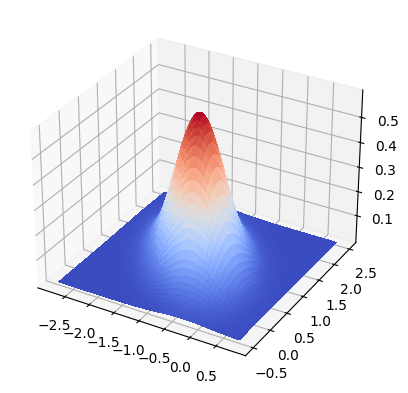

In [ ]:

x_space = np.linspace(mean[0] - 1.8, mean[0] + 1.8, 250)
y_space = np.linspace(mean[1] - 1.5, mean[1] + 1.5, 250)

draw_density(x_space, y_space, generate_p(mean, sigma))

### Задание 2
Найдите аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный.

Введём матрицу и вектор:

$
A = \begin{pmatrix}
  \frac{3}{\sqrt3} & \frac{2}{\sqrt3}\\
  0 & \sqrt\frac{14}{3}
\end{pmatrix}
\\
\\
B = \begin{pmatrix}
  \frac{1}{\sqrt3} \\
  -\sqrt\frac{14}{3}
\end{pmatrix}
$

Такие, что

$
\begin{pmatrix}
  \xi_{st} \\
  \eta_{st}
\end{pmatrix}
= A
\begin{pmatrix}
  \xi \\
  \eta
\end{pmatrix}
+ B
$

Покажем, что полученный выше вектор - стандартный.

$
A\mu + B
=
\begin{pmatrix}
  \frac{3}{\sqrt3} & \frac{2}{\sqrt3}\\
  0 & \sqrt\frac{14}{3}
\end{pmatrix}
\begin{pmatrix}
  -1 \\
  1
\end{pmatrix}
+
\begin{pmatrix}
  \frac{1}{\sqrt3} \\
  -\sqrt\frac{14}{3}
\end{pmatrix}
=
\begin{pmatrix}
  0 \\
  0
\end{pmatrix}
$

$
A \Sigma A^{\intercal} =
\frac{1}{3}
\begin{pmatrix}
  3 & 2\\
  0 & \sqrt{14}
\end{pmatrix}
\begin{pmatrix}
  3 & 2 \\
  2 & 6
\end{pmatrix}
\begin{pmatrix}
  3 & 0\\
  2 & \sqrt{14}
\end{pmatrix}
=
\begin{pmatrix}
  1 & 0\\
  0 & 1
\end{pmatrix}
$

In [ ]:
A = 1/np.sqrt(3) * np.array([[3,2], [0, np.sqrt(14)]], dtype=float)
A.dot(sigma).dot(A.T)

array([[ 1.00000000e+00, -1.25408452e-17],
       [-2.32782194e-17,  1.00000000e+00]])

## Задание 3
Найти ортогональное преобразование, переводящее
соответствующий центрированный случайный вектор
в вектор с независимыми компонентами. Построить
график плотности полученного распределения.

Найдём собственные числа обратной ковариационной матрицы.

$ |\Sigma^{-1} -\lambda E| = 0
⟺
\begin{vmatrix}
  3-λ & 2 \\
  2 & 6-λ
\end{vmatrix} = 0
⟺
λ^2 -9λ + 14 = 0
$

Откуда
$λ_1 = 2; \lambda_2 = 7$

Теперь найдём ортонормированные собственные вектора.

$
\begin{pmatrix}
  3-λ_1 & 2 \\
  2 & 6-λ_1
\end{pmatrix}v_1 = 0
⟺
\begin{pmatrix}
  1 & 2 \\
  2 & 4
\end{pmatrix}v_1 = 0
⟹
v_1 = \frac{1}{\sqrt5}\begin{pmatrix}
  2 \\
  -1
\end{pmatrix}
$

$
\begin{pmatrix}
  3-λ_2 & 2 \\
  2 & 6-λ_1
\end{pmatrix}v_2 = 0
⟺
\begin{pmatrix}
  -4 & 2 \\
  2 & -1
\end{pmatrix}v_2 = 0
⟹
v_2 = \frac{1}{\sqrt5}\begin{pmatrix}
  1 \\
  2
\end{pmatrix}
$

Теперь можно записать матрицу ортогонального преобразования:
$
Q^{\intercal} = \frac{1}{\sqrt5} \begin{pmatrix}
  2 & 1 \\
  -1 & 2
\end{pmatrix}
⟹
Q = \frac{1}{\sqrt5} \begin{pmatrix}
  2 & -1 \\
  1 & 2
\end{pmatrix}
$


In [ ]:
Q = 1/np.sqrt(5) * np.array([[2,-1], [1,2]], dtype=float)

$
\begin{pmatrix}
  \xi_{ort} \\
  \eta_{ort}
\end{pmatrix}
=
Q
\begin{pmatrix}
  \xi \\
  \eta
\end{pmatrix}
=
\frac{1}{\sqrt5}
\begin{pmatrix}
  2\xi - \eta \\
  \eta + 2\eta
\end{pmatrix}
$

Проверим, что компоненты вектора независимы.

$
\Sigma_{ort} = Q \Sigma Q^{\intercal} =
\begin{pmatrix}
  \frac{1}{2} & 0 \\
  0 & \frac{2}{14}
\end{pmatrix}
$

Также вычислим мат. ожидание:
$
\mathbb E
\begin{pmatrix}
  \xi_{ort} \\
  \eta_{ort}
\end{pmatrix} =
\frac{1}{\sqrt5}
\begin{pmatrix}
  2\mathbb E \xi - \mathbb E\eta \\
  \mathbb E\xi + 2\mathbb E \eta
\end{pmatrix} =
\frac{1}{\sqrt5}
\begin{pmatrix}
  -3 \\
  1
\end{pmatrix}
$

In [ ]:
sigma_ort = Q.dot(sigma).dot(Q.T)
sigma_ort_inv = np.linalg.inv(sigma_ort)
mean_ort = Q.dot(mean)
C_ort = 1 / (2*np.pi*np.sqrt(np.linalg.det( sigma_ort )))
print(f"{14 * sigma_ort=}")
print(f"{mean_ort=}")

14 * sigma_ort=array([[ 7.00000000e+00, -8.81644638e-17],
       [ 1.65395566e-16,  2.00000000e+00]])
mean_ort=array([-1.34164079,  0.4472136 ])


[-1.34164079  0.4472136 ]


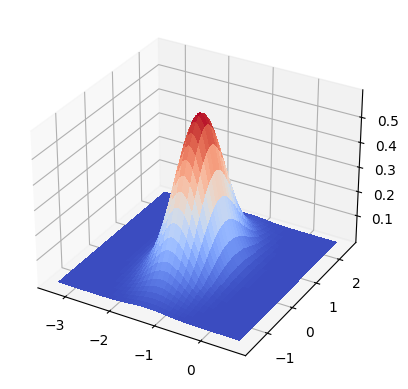

In [ ]:

x_space_draw = np.linspace(mean_ort[0]-2, mean_ort[0]+2, 151)
y_space_draw = np.linspace(mean_ort[1]-2, mean_ort[1]+2, 151)
print(mean_ort)

draw_density(x_space_draw, y_space_draw, generate_p(mean_ort, sigma_ort))
#x_space, y_space = np.meshgrid(x_space, y_space)
#surf = ax.plot_surface(x_space, y_space, p_ort(x_space, y_space), cmap=cm.coolwarm, linewidth=0, antialiased=False)

## Задание 4
Вычислить характеристики совместного распределения случайного вектора
$
\begin{pmatrix}
  -5\xi - 4\eta \\
  -5\xi + 3\eta
\end{pmatrix}
$
и записать его плотность. Построить график плотности полученного
распределения.

$
\begin{pmatrix}
  \xi_0 \\
  \eta_0
\end{pmatrix}
=
\begin{pmatrix}
  -5\xi - 4\eta \\
  -5\xi + 3\eta
\end{pmatrix}
=
A
\begin{pmatrix}
  \xi \\
  \eta
\end{pmatrix}
$,
где $ A = \begin{pmatrix}
  -5 & -4 \\
  -5 & 3
\end{pmatrix} $

Теперь посчитаем его характеристики:

$
\mathbb E_0 \begin{pmatrix}
  \xi_0 \\
  \eta_0
\end{pmatrix} =
\begin{pmatrix}
  -5\mathbb{E}\xi - 4\mathbb{E}\eta \\
  -5\mathbb{E}\xi + 3\mathbb{E}\eta
\end{pmatrix} =
\begin{pmatrix}
  1 \\
  8
\end{pmatrix}
$

$
\Sigma_0 = A \Sigma A^{\intercal} = \frac{1}{14}\begin{pmatrix}
  118 & 104 \\
  104 & 237
\end{pmatrix}
$

In [ ]:
A = np.array([[-5, -4], [-5, 3]], dtype=float)
A.dot(sigma).dot(A.T) * 14

array([[118., 104.],
       [104., 237.]])

$
p_0(x,y) = \exp \left(-\frac{1}{2}\left(
  \begin{pmatrix}
    x \\ y
  \end{pmatrix} - \begin{pmatrix}
    1 \\ 8
  \end{pmatrix}
\right)^{\intercal} \Sigma_0 \left(
  \begin{pmatrix}
    x \\ y
  \end{pmatrix} - \begin{pmatrix}
    1 \\ 8
  \end{pmatrix}
\right)\right)
$

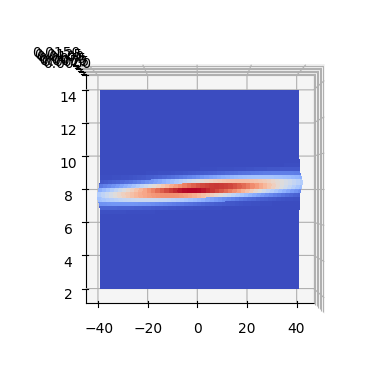

In [ ]:
A = np.array([[-5, -4], [-5, 3]], dtype=float)
mean_A = np.array([1,8], dtype=float)
x_space = np.linspace(mean_A[0]-40, mean_A[0]+40, 1001)
y_space = np.linspace(mean_A[1]-6, mean_A[1]+6, 1001)

draw_density(x_space, y_space, generate_p(mean_A, A.dot(sigma).dot(A.T)), True)

## Задание 5
Найти условное распределение $\xi$ при условии $\eta$.
Вычислить E($\xi|\eta$) и D($\xi|\eta$).

$p_{\xi|\eta=y}(x) = \frac{p_{\xi,\eta}(x,y)}{p_{\eta}(y)}$

Вычислим плотность распределения $\eta$

$p_{\eta}(y) = \int_{\mathbb{R}} p_{\xi,\eta}(x,y) \,dx
= C \int_{\mathbb{R}} \exp\left(-\frac{1}{2} \left( 3\left(x+\left(\frac{2y+1}{3}\right)\right)^2 +\frac{14}{3}\left(y-1\right)^2 \right)\right) \,dx \\
= C \int_{\mathbb{R}} \exp\left(-\frac{1}{2} \left( 3t^2 +\frac{14}{3}\left(y-1\right)^2 \right)\right) \,dx \\
= C \int_{\mathbb{R}} \exp\left(-\frac{3}{2} t^2 - \frac{7}{3}\left(y-1\right)^2 \right) \,dx \\
= C\exp\left(- \frac{7}{3}\left(y-1\right)^2\right) \int_{\mathbb{R}} \exp\left(-\frac{3}{2} t^2 \right) \,dx \\
= \frac{1}{2\pi\sqrt14} \sqrt{\frac{2\pi}{3}}\exp\left(- \frac{7}{3}\left(y-1\right)^2\right)  \\
= \frac{1}{2\sqrt{42\pi}} \exp\left(- \frac{7}{3}\left(y-1\right)^2\right)$

Теперь, подставляя всё в формулу плотности условного распределения, получаем:

$p_{\xi|\eta=y}(x) =
\frac{p_{\xi,\eta}(x,y)}{p_{\eta}(y)} =
\frac
{C \exp\left(-\frac{1}{2}\left(3(x+1)^2 + 4(x+1)(y-1) + 6(y-1)^2\right)\right)}
{C \sqrt{\frac{2\pi}{3}}\exp\left(- \frac{7}{3}\left(y-1\right)^2\right) } \\
= \sqrt{\frac{3}{2\pi}}\exp \left(-\frac{1}{2}\left(3(x+1)^2 + 4(x+1)(y-1) + \frac{4}{3}(y-1)^2\right)\right) \\
= \sqrt{\frac{3}{2\pi}}\exp\left(-\frac{3}{2}\left((x+1)+\frac{2}{3}(y-1)\right)^2\right) \\
= \sqrt{\frac{3}{2\pi}}\exp\left(-\frac{3}{2}\left(x+\frac{2}{3}y+\frac{1}{3}\right)^2\right) $

Теперь можем вычислить мат. ожидание и дисперсию.

Данный интеграл вычисляется при помощи замены.

$\mathbb E(\xi | \eta) = \int_\mathbb{R} x \sqrt{\frac{3}{2\pi}}\exp\left(-\frac{3}{2}\left(x+\frac{2}{3}y+\frac{1}{3}\right)^2\right)\,dx = -\frac{1}{3}(2y+1)$

Следующий интеграл можно вычислить при помощи интегрирования по частям.

$\mathbb D(\xi | \eta) = \int_\mathbb{R} x^2 \sqrt{\frac{3}{2\pi}}\exp\left(-\frac{3}{2}\left(x+\frac{2}{3}y+\frac{1}{3}\right)^2\right)\,dx = \frac{4}{9}(y^2+y+1)$


## Выводы

В ходе лабораторной работы были вычислены основные числовые характеристики двумерной нормально распределённой случайной величины.

Было найдено аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный. Также было найдено ортогональное преобразование, переводящее исходные случайный вектор в вектор с независимыми компонентами.

Были вычислены числовые характеристики случайного вектора, полученного из исходного аффинным преобразованием.

При помощи языка Python были построены графики плотностей полученных распределений.